# Librerias y Data Set

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

In [21]:
clientes_final = pd.read_csv('drive/MyDrive/Nuevos_Datasets_TFM/CLIENTES_FINAL.csv')

In [22]:
clientes_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2552470 entries, 0 to 2552469
Data columns (total 36 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   pk_cid                       int64  
 1   active_customer              bool   
 2   segment                      int64  
 3   region_code                  float64
 4   age                          float64
 5   salary                       float64
 6   es_españa?                   int64  
 7   age_group_18-20              int64  
 8   age_group_20-29              int64  
 9   age_group_30-39              int64  
 10  age_group_40-49              int64  
 11  age_group_50-59              int64  
 12  age_group_60-69              int64  
 13  age_group_70-79              int64  
 14  age_group_80-89              int64  
 15  age_group_90-100             int64  
 16  gender_H                     int64  
 17  gender_V                     int64  
 18  family_product_account       int64  
 19  

# Preparacion !

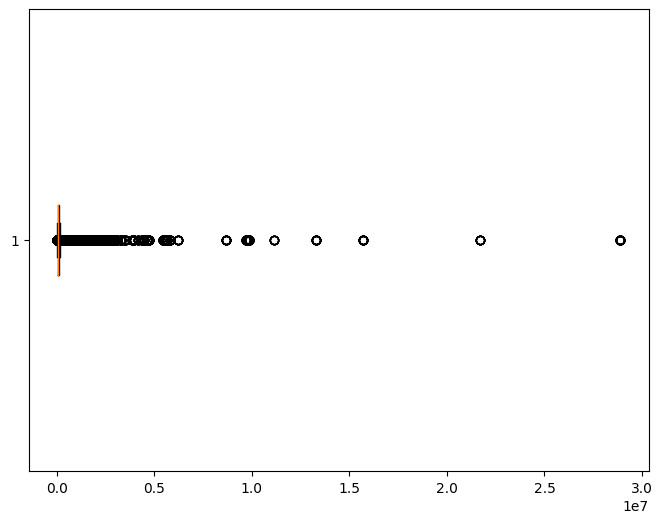

In [23]:
plt.boxplot(clientes_final["salary"], vert=False)

# Show the plot
plt.show()

In [24]:
clientes_final['salary'] = clientes_final['salary'].apply(lambda x: np.log(x+1))

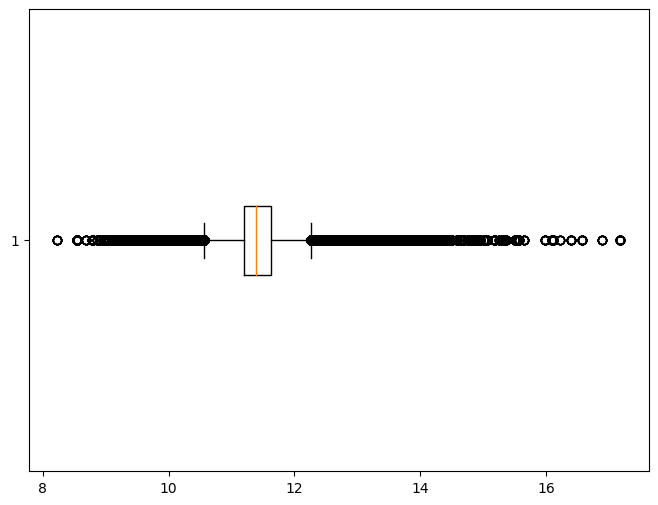

In [25]:
plt.boxplot(clientes_final['salary'], vert=False)

# Show the plot
plt.show()

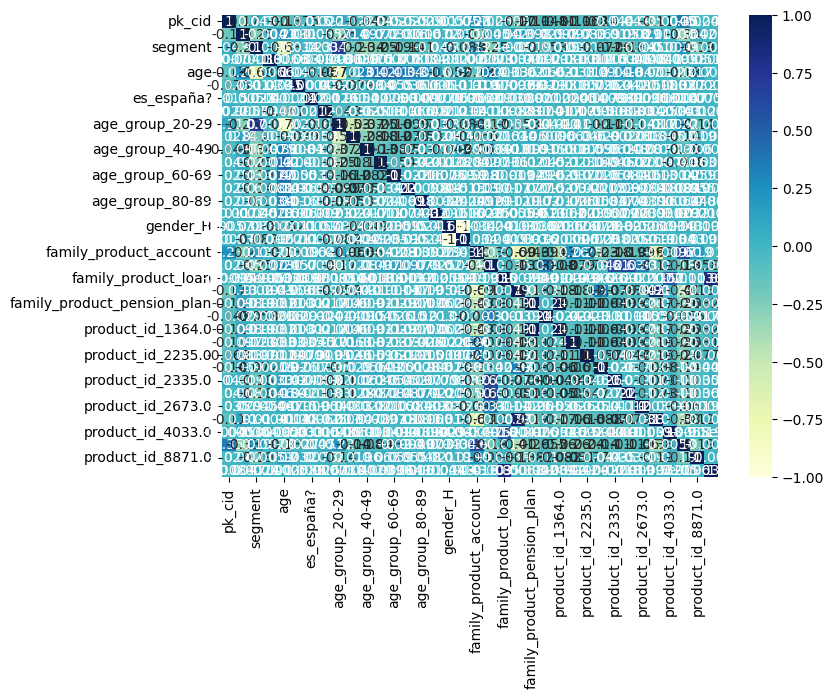

In [26]:
plt.rcParams['figure.figsize'] = 8, 6
sns.heatmap(clientes_final.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

In [28]:
# se guarda la target como y y las features como X

y = clientes_final['segment']
X = clientes_final.drop('segment', axis=1)

# se guarda un 30% de datos para el test y un 70% para el train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
X_train.shape

(1786729, 35)

In [30]:
X_test.shape

(765741, 35)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
y_train = y_train - 1
y_test = y_test - 1

# Modelado

In [33]:
#Entrenar Modelo

xgbc_base = xgb.XGBClassifier(random_state=42)

xgbc_base.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [34]:
y_pred = xgbc_base.predict(X_test)


In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
accuracy = accuracy_score(y_test, y_pred)

In [37]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.47%


In [38]:
report = classification_report(y_test, y_pred)

In [39]:
print(report)

              precision    recall  f1-score   support

           0       0.74      0.23      0.35     41848
           1       0.86      0.92      0.89    413952
           2       0.90      0.91      0.90    309941

    accuracy                           0.87    765741
   macro avg       0.83      0.68      0.71    765741
weighted avg       0.87      0.87      0.86    765741

